In [1]:
import xara
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import ExoRIM as exo
%matplotlib inline

In [2]:
[file for file in os.listdir(xara.__path__[0]) if "txt" in file]

['golay9.txt',
 'palomar_med_cross.txt',
 'hst.txt',
 'subaru_asym.txt',
 'tmt.txt']

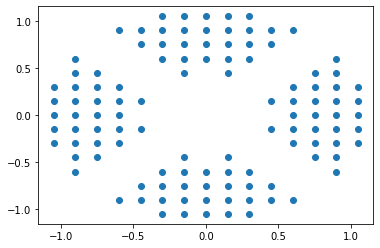

In [3]:
hst_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "hst.txt"))
plt.scatter(hst_virtual_aperture[:, 0], hst_virtual_aperture[:, 1])

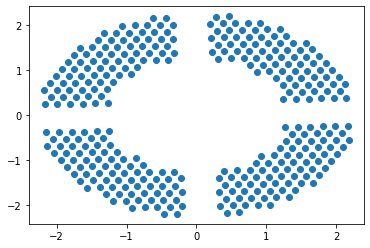

In [4]:
palomar_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "palomar_med_cross.txt"))
plt.scatter(palomar_virtual_aperture[:, 0], palomar_virtual_aperture[:, 1])

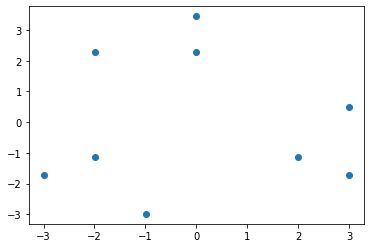

In [5]:
golay_mask = np.loadtxt(os.path.join(xara.__path__[0], "golay9.txt"))
plt.scatter(golay_mask[:, 0], golay_mask[:, 1])

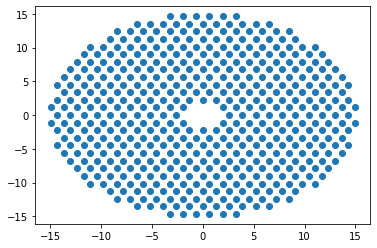

In [6]:
#thirty meter telescope
tmt_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "tmt.txt"))
plt.scatter(tmt_virtual_aperture[:, 0], tmt_virtual_aperture[:, 1])

In [7]:
cwavel = 1e-6 # Wavelength [m]
ISZ = 32# Array size (number of pixel on a side)
pscale = 0.1 # plate scale [mas/pixel]
m2pix = xara.core.mas2rad(pscale) * ISZ / cwavel  # [1/m] units for (u, v) Fourier space
m2pix

0.015514037795505156

In [8]:
kpi = xara.KPI(array=golay_mask)

Attempting to build KPI from array None
36 distinct baselines were identified
10 first singular values for this array:
[3. 3. 3. 3. 3. 3. 3. 1.]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -   9 sub-apertures
        -  36 distinct baselines
        -  28 Ker-phases (77.8 % target phase information recovery)
        -   8 Eig-phases (88.9 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created


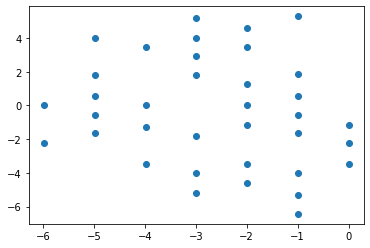

In [9]:
plt.scatter(kpi.UVC[:, 0], kpi.UVC[:, 1])

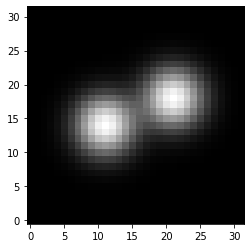

In [10]:
image_coords = np.arange(ISZ) - ISZ / 2.
xx, yy = np.meshgrid(image_coords, image_coords)
image = np.zeros_like(xx)
rho_squared = (xx - 5) ** 2 + (yy-2) ** 2
image += np.exp(-0.5 * (rho_squared / 3 ** 2))
rho_squared = (xx + 5) ** 2 + (yy+2) ** 2
image += np.exp(-0.5 * (rho_squared / 3 ** 2))
plt.imshow(image, cmap="gray")

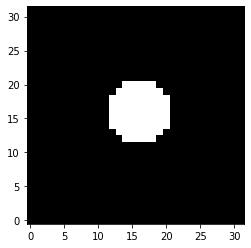

In [11]:
image_coords = np.arange(ISZ) - ISZ / 2.
xx, yy = np.meshgrid(image_coords, image_coords)
image2 = np.zeros_like(xx)
rho_squared = (xx) ** 2 + (yy) ** 2
image2 += rho_squared**(1/2) < 5
plt.imshow(image2, cmap="gray")

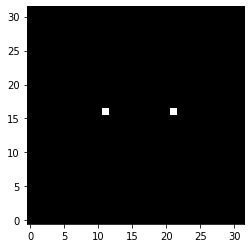

In [12]:
image3 = np.zeros_like(image)
rho1 = (xx - 5)**2 + (yy)**2
image3 += rho1 < 1
rho1 = (xx + 5)**2 + (yy)**2
image3 += rho1 < 1
plt.imshow(image3, cmap="gray")

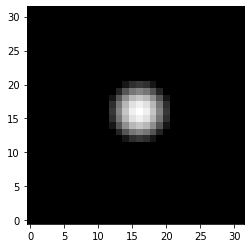

In [13]:
image4 = np.zeros_like(image)
rho =np.sqrt(rho_squared)
alpha = 10 # pixel
def limb_darkening_factor(rho, n):
    assert n <= 3
    ans = np.zeros_like(rho)
    radicand = 1 - 4*rho**2/100
    ans[np.where(radicand > 0)] += (1 - 4*rho[np.where(radicand > 0)]**2/100)**(n/2)
    return ans
image4 += (np.sqrt(rho) < 10) * limb_darkening_factor(rho, 3)  # limb darkening model
plt.imshow(image4, cmap="gray")

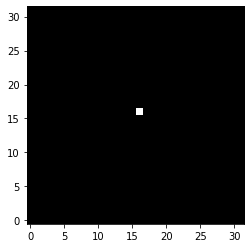

In [14]:
unresolved_source = np.zeros_like(image)
rho = np.sqrt(xx**2 + yy**2)
unresolved_source += ~(rho > 0)
plt.imshow(unresolved_source, cmap="gray")

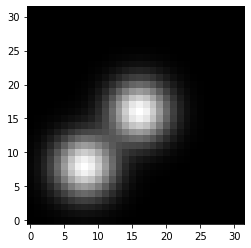

In [15]:
image5 = np.zeros_like(image)
rho_squared = (xx) ** 2 + (yy) ** 2
image5 += np.exp(-0.5 * (rho_squared / 3 ** 2))
rho_squared = (xx + 8) ** 2 + (yy+8) ** 2
image5 += np.exp(-0.5 * (rho_squared / 3 ** 2))
plt.imshow(image5, cmap="gray")

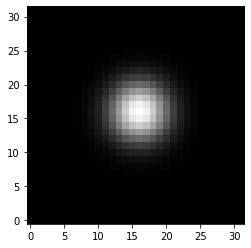

In [16]:
image6 = np.zeros_like(image)
rho_squared = (xx) ** 2 + (yy) ** 2
image6 += np.exp(-0.5 * (rho_squared / 3 ** 2))
plt.imshow(image6, cmap="gray")

(-112.70410198083282,
 111.92221556755842,
 -121.34056340500243,
 111.85208455402385)

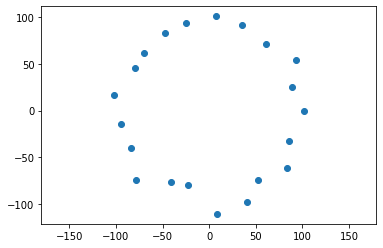

In [17]:
N = 21
circle_mask = np.zeros((N, 2))
for i in range(N):
    circle_mask[i,0] = (100 + 10*np.random.normal())*np.cos(2*np.pi*i/N)
    circle_mask[i,1] = (100 + 10*np.random.normal())*np.sin(2*np.pi*i/N)
plt.scatter(circle_mask[:, 0], circle_mask[:, 1])
plt.axis("equal")

In [18]:
random_mask = np.random.normal(size=(9, 2))
random_mask

array([[ 1.02405707,  0.09537493],
       [-1.17057012, -0.70078747],
       [ 0.32151232,  0.93710907],
       [-0.54246936,  1.74036162],
       [-0.96509792,  0.88454597],
       [-0.03541354,  0.83274729],
       [-0.74773355, -1.13475357],
       [-0.519332  ,  0.30815835],
       [ 0.58373793, -2.50312719]])

In [19]:
kpi = xara.KPI(array=circle_mask, ndgt=8)
B = exo.Baselines(circle_mask) # simili KPI

Attempting to build KPI from array None
210 distinct baselines were identified
10 first singular values for this array:
[4.58257569 4.58257569 4.58257569 4.58257569 4.58257569 4.58257569
 4.58257569 4.58257569 4.58257569 4.58257569]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -  21 sub-apertures
        - 210 distinct baselines
        - 190 Ker-phases (90.5 % target phase information recovery)
        -  20 Eig-phases (95.2 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created


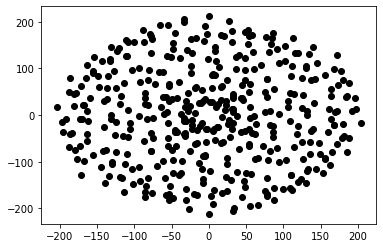

In [20]:
# uv plane
plt.scatter(kpi.UVC[:, 0], kpi.UVC[:, 1], c="k")
plt.scatter(-kpi.UVC[:, 0], -kpi.UVC[:, 1], c="k")

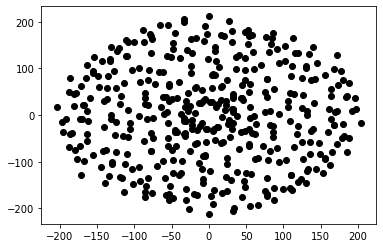

In [21]:
# uv plane
plt.scatter(B.UVC[:, 0], B.UVC[:, 1], c="k")
plt.scatter(-B.UVC[:, 0], -B.UVC[:, 1], c="k")

In [22]:
def rad2mas(x):
    '''  convert radians to mas'''
    return(x / 4.8481368110953599e-09) # = x / (np.pi/(180*3600*1000))

Attempting to build KPI from array None
210 distinct baselines were identified
10 first singular values for this array:
[4.58257569 4.58257569 4.58257569 4.58257569 4.58257569 4.58257569
 4.58257569 4.58257569 4.58257569 4.58257569]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -  21 sub-apertures
        - 210 distinct baselines
        - 190 Ker-phases (90.5 % target phase information recovery)
        -  20 Eig-phases (95.2 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created
Scale factor = 8.45e-01 1/m
230.95616096680672
Resolution = 4.47e-01


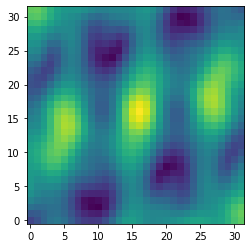

In [69]:
N = 21
circle_mask = np.zeros((N, 2))
for i in range(N):
    circle_mask[i,0] = (100 + 10*np.random.normal())*np.cos(2*np.pi*i/N)
    circle_mask[i,1] = (100 + 10*np.random.normal())*np.sin(2*np.pi*i/N)
kpi = xara.KPI(array=circle_mask, ndgt=8)
B = exo.Baselines(circle_mask) # simili KPI
baseline = np.sqrt(B.UVC[:, 0]**2 + B.UVC[:, 1]**2)
cwavel = 1e-6 # Wavelength [m]
ISZ = 32# Array size (number of pixel on a side)
pscale = 10 * rad2mas(1.22 * 0.5 * cwavel / np.max(baseline)) # plate scale [mas/pixel]
m2pix = xara.core.mas2rad(pscale) * ISZ / cwavel  # [1/m] units for (u, v) Fourier space
print(f"Scale factor = {m2pix:.2e} 1/m")
print(np.max(baseline))
print(f"Resolution = {rad2mas(0.5 * cwavel / np.max(baseline)):.2e}")
dft_matrix = xara.core.compute_DFTM1(B.UVC, m2pix, ISZ)
dft_matrix_i = xara.core.compute_DFTM1(B.UVC, m2pix, ISZ, inv=True)
# There is an analytical solution for gamma in term of r only for circular star and limb darkening model
# For binary, the solution is in term of u (for point like star), in general the solution lies in the Fourier space gamma(u, v)
# X = unresolved_source
X = image
gamma2 = np.dot(dft_matrix, np.ravel(X))
dirty_image = np.dot(np.abs(gamma2), dft_matrix_i.T)
dirty_image = dirty_image.reshape((ISZ, ISZ))
plt.imshow(np.absolute(dirty_image))

In [43]:
# There is an analytical solution for gamma in term of r only for circular star and limb darkening model
# For binary, the solution is in term of u (for point like star), in general the solution lies in the Fourier space gamma(u, v)
X = image6
flux = np.sum(X)
# X = unresolved_source
# introduce random phase error
gamma = np.dot(dft_matrix, np.ravel(X))
gamma2 = np.dot(dft_matrix2, np.ravel(X))

In [44]:
dirty_image = np.dot(gamma2, dft_matrix_i.T)

array([[1.83568929, 1.90676387, 1.27225186, ..., 0.50784974, 0.8882402 ,
        1.37694928],
       [1.81744331, 2.16217326, 1.7650172 , ..., 0.43727337, 0.84704959,
        1.46119908],
       [1.4912052 , 1.98474241, 1.86890062, ..., 0.798079  , 1.19723138,
        1.5597499 ],
       ...,
       [1.41213087, 1.74201221, 1.59364548, ..., 1.23588969, 1.54064268,
        1.43789412],
       [1.47681474, 1.55974975, 1.19723085, ..., 1.19090782, 1.8689009 ,
        1.98474353],
       [1.48268965, 1.46119928, 0.84704965, ..., 0.80260654, 1.76501752,
        2.16217465]])

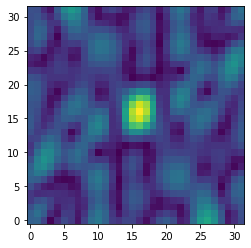

In [45]:
dirty_image = dirty_image.reshape((ISZ, ISZ))
plt.imshow(np.absolute(dirty_image))
np.absolute(dirty_image)/flux

## Explore closure phase for binary and unresolved source: inspect error introduced in visibilities (do they cancel out like they should for given method to compute closure phase)

In [47]:
method1 = exo.phase_closure_operator(B, 0) # Labeyrie and litterature proposed method
method3 = exo.kpi(mask=B.VAC).uv_to_bsp # Ben code

There are 190 independant closure phases
210 distinct baselines were identified
190 Kernel Phases identified.
Now calculating bispectrum
Calculating bispectrum matrix. Will take a few minutes.
Done 0 of 21 .  190  bispectra found. Time taken: 0.0 sec
Done. Total time taken: 0.0 mins
Found 1330 bispectra
Doing sparse svd
Matrix rank: 190
Reduced-rank bispectrum matrix calculated.
Matrix shape (190, 210)
Time taken: 0.0 mins


In [48]:
# should be 0 for unresolved source
phases = np.angle(gamma2)
amp = np.abs(gamma2)
phases

array([-3.02785465e-08, -6.11103447e-07,  9.94155934e-05,  7.26983266e-04,
       -8.64271095e-03,  5.57462212e-01,  1.97017113e+00,  1.06216804e+00,
        2.50379591e+00, -7.27475275e-01,  1.59138698e+00,  5.29513462e-01,
        8.01841922e-01, -3.14080481e+00, -1.39986735e+00,  3.01182753e-02,
       -1.92480688e-03, -6.50320431e-04,  3.26209816e-06,  2.53513550e-07,
       -1.61949127e-07, -8.13149642e-07,  1.55519354e-04,  3.48380527e-02,
       -2.17115578e+00,  1.37498527e+00,  1.50109314e-01,  1.80982098e+00,
       -1.31326317e+00,  9.73288391e-01, -4.96229031e-01, -1.59398750e+00,
        2.53869827e+00,  7.24668457e-02, -1.18134426e+00,  5.23513649e-01,
        1.79031052e+00, -2.11441949e-03, -1.40663182e-05,  8.57375090e-09,
       -7.81919577e-07, -1.93508076e-05,  2.74832195e-02, -1.58599221e+00,
       -2.51719534e+00, -1.09222995e+00,  1.99657862e+00, -1.94995212e+00,
       -3.07857081e+00,  1.36242439e+00,  1.44384648e-01,  2.21885587e+00,
       -9.79089757e-01,  

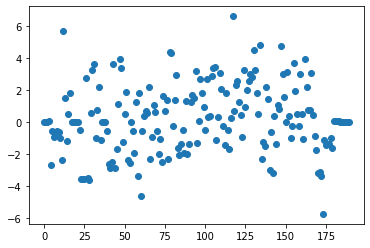

In [53]:
# noise in apertures
noise = np.random.random(size=kpi.nbap)
phase_noise = np.dot(B.BLM, noise)
noisy_phases = phases + phase_noise
closure_phases = np.dot(method1, noisy_phases)
plt.scatter(np.arange(closure_phases.size), closure_phases)

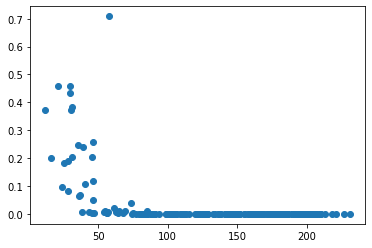

In [50]:
plt.scatter(baseline, np.real(gamma2)/flux)

In [51]:
np.where(closure_phases == 0)[0].size

0